#### GUI Development

In [1]:
import ipywidgets as widgets
from ipywidgets import Dropdown, Checkbox, IntSlider, VBox, HBox
import matplotlib.pyplot as plt

from IPython.display import display
import tkinter as tk
from tkinter import ttk

from data.graph_data import *
from ba_utils.visualization import *
from ba_utils.orderings import *

import ba_utils.data_generator as data_gen
import ba_utils.network_rugs as nrugs

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Graphs created


In [ ]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

num_artists 24
colormap created with turbo and 1 to 24


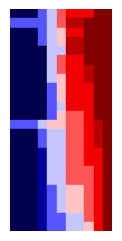

In [2]:
def draw_networkrug(graphs, color_encoding='closeness_centrality', labels=False, pixel_size=6):
    """
    Draws a single NetworkRug with a specific color encoding and pixel size.
    Adjusts figure size dynamically to support scalability in node/time dimensions.
    """
    ordering = get_priority_bfs_ordering(graphs)

    fig = draw_rug_from_graphs(
        graphs_data=graphs,
        ordering=ordering,
        color_encoding=color_encoding,
        labels=labels,
        pixel_size=pixel_size
    )
    return fig

draw_networkrug(merge_graphs, color_encoding='closeness_centrality', labels=False, pixel_size=12)

num_artists 24
colormap created with turbo and 1 to 24


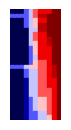

In [3]:
def interactive_rug(graphs):
    color_options = ['id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'eigenvector_centrality']
    color_dropdown = widgets.Dropdown(options=color_options, value='closeness_centrality', description='Color:')
    label_toggle = widgets.Checkbox(value=False, description='Show Labels')
    
    pixel_slider = widgets.IntSlider(
        value=6,
        min=2,
        max=20,
        step=1,
        description='Pixel Size:',
        continuous_update=False
    )

    ui = widgets.VBox([widgets.HBox([color_dropdown, label_toggle, pixel_slider])])

    def update_plot(change=None):
        draw_networkrug(
            graphs,
            color_encoding=color_dropdown.value,
            labels=label_toggle.value,
            pixel_size=pixel_slider.value
        )

    # Register observers
    color_dropdown.observe(update_plot, names='value')
    label_toggle.observe(update_plot, names='value')
    pixel_slider.observe(update_plot, names='value')

    display(ui)
    update_plot()
    
interactive_rug(merge_graphs)

In [ ]:
nrugs.interactive_rug(merge_graphs)

In [ ]:
root = tk.Tk()

label1 = tk.Label(root, text="Hallo World!")
label1.pack()

root.mainloop()

In [9]:
#main functionality in network_rugs.py
import ba_utils.network_rugs as nrugs

nrugs.launch_tkinter_ui(merge_graphs)

num_artists 24
colormap created with turbo and 1 to 24


In [2]:
def draw_networkrug(graphs, color_encoding='closeness_centrality', colormap='turbo', labels=False, pixel_size=6, order="", ax=None, start_nodes=None):
    """
    Draws a single NetworkRug with a specific color encoding and pixel size.
    Adjusts figure size dynamically to support scalability in node/time dimensions.
    calls draw_rug_from_graphs() from visualization.py
    
    Use this for start_nodes
    start_nodes = {timestamp: 15 for timestamp in test.keys()}
    """
    if order == "prio":
        ordering = get_priority_bfs_ordering(graphs, start_nodes)
    if order == "bfs":
        ordering = get_BFS_ordering(graphs, start_nodes, sorting_key='weight')
    if order == "dfs":
        ordering = get_DFS_ordering(graphs, start_nodes)
    if order == "degree":
        ordering = get_centrality_ordering(graphs, centrality_measure="degree")
    else:
        ordering = get_priority_bfs_ordering(graphs, start_nodes)

    fig = draw_rug_from_graphs(
        graphs_data=graphs,
        ordering=ordering,
        color_encoding=color_encoding,
        colormap= colormap,
        labels=labels,
        pixel_size=pixel_size,
        ax=ax
    )

    return fig

# --- Jupyter Notebook Interface ---
def interactive_rug(graphs):
    color_options = ['custom', 'id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality']
    color_dropdown = Dropdown(options=color_options, value='custom', description='Color:')
    
    colormap_option = ['turbo', 'gist_rainbow', 'ocean', 'rainbow', 'bwr', 'viridis', 'plasma', 'cividis']
    colormap_dropdown = Dropdown(options=colormap_option, value='turbo', description='Colormap:')
    
    label_toggle = Checkbox(value=False, description='Show Labels')
    pixel_slider = IntSlider(value=6, min=2, max=20, step=1, description='Pixel Size:', continuous_update=False)
    
    ui = VBox([HBox([color_dropdown, colormap_dropdown, label_toggle, pixel_slider])])

    def update_plot(change=None):
        draw_networkrug(graphs, color_encoding=color_dropdown.value, colormap=colormap_dropdown.value, labels=label_toggle.value, pixel_size=pixel_slider.value)

    color_dropdown.observe(update_plot, names='value')
    colormap_dropdown.observe(update_plot, names='value')
    label_toggle.observe(update_plot, names='value')
    pixel_slider.observe(update_plot, names='value')

    display(ui)
    update_plot()


# --- Tkinter GUI Interface ---
def launch_tkinter_ui(graphs):
    def render():
        fig = plt.Figure()
        ax = fig.add_subplot(111)
        draw_networkrug(
            graphs,
            color_encoding=color_var.get(),
            colormap=colormap_box.get(),
            labels=label_var.get(),
            pixel_size=pixel_var.get(),
            ax=ax
        )
        for widget in canvas_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill='both', expand=True)

    def update_pixel_label(value):
        pixel_value_label.config(text=f"{int(float(value))} px")

    root = tk.Tk()
    root.title("NetworkRug Visualizer")
    #window.geometry("widthxheight+XPOS+YPOS")
    root.geometry("1600x800")  # Default window size

    # --- Variables ---
    color_var = tk.StringVar(value='closeness_centrality')
    colormap_var = tk.StringVar(value='turbo')
    label_var = tk.BooleanVar()
    pixel_var = tk.IntVar(value=6)

    # --- Control Frame ---
    control_frame = ttk.Frame(root)
    control_frame.pack(side='top', pady=10)

    # --- Color Dropdown ---
    ttk.Label(control_frame, text="Color Encoding:").grid(row=0, column=0, sticky='e', padx=5)
    color_box = ttk.Combobox(control_frame, textvariable=color_var, values=[
        'custom','id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality'])
    color_box.grid(row=0, column=1, padx=5)
    
    # --- Colormap Dropdown ---
    ttk.Label(control_frame, text="Colormap:").grid(row=0, column=3, sticky='e', padx=5)
    colormap_box = ttk.Combobox(control_frame, textvariable=colormap_var, values=[
        'turbo', 'gist_rainbow', 'ocean', 'rainbow', 'bwr', 'viridis', 'plasma', 'cividis'])
    colormap_box.grid(row=0, column=4, padx=5)
    

    # --- Label Checkbox ---
    ttk.Checkbutton(control_frame, text="Show Labels", variable=label_var).grid(row=0, column=2, padx=5)

    # --- Pixel Size Slider + Label ---
    ttk.Label(control_frame, text="Pixel Size:").grid(row=1, column=0, sticky='e', padx=5)
    pixel_slider = ttk.Scale(control_frame, variable=pixel_var, from_=2, to=20, orient='horizontal',
                             command=update_pixel_label)
    pixel_slider.grid(row=1, column=1, sticky='we', padx=5)
    pixel_value_label = ttk.Label(control_frame, text=f"{pixel_var.get()} px")
    pixel_value_label.grid(row=1, column=2, padx=5)

    # --- Render Button ---
    ttk.Button(control_frame, text="Render", command=render).grid(row=2, column=0, columnspan=3, pady=10)

    # --- Canvas for Plot ---
    canvas_frame = ttk.Frame(root)
    canvas_frame.pack(side='bottom', fill='both', expand=True)

    root.mainloop()


In [3]:
launch_tkinter_ui(merge_graphs)

num_artists 24
colormap created with turbo and 1 to 24


### Application with 2 pages

In [5]:
import tkinter as tk

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Multi-Page App")
        self.geometry("400x300")

        # Container to stack frames (pages)
        container = tk.Frame(self)
        container.pack(fill="both", expand=True)

        self.frames = {}

        for F in (HomePage, SettingsPage):
            page_name = F.__name__
            frame = F(parent=container, controller=self)
            self.frames[page_name] = frame
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame("HomePage")

    def show_frame(self, page_name):
        '''Raise the selected frame'''
        frame = self.frames[page_name]
        frame.tkraise()

class HomePage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = tk.Label(self, text="🏠 Home Page", font=("Arial", 18))
        label.pack(pady=20)

        go_to_settings = tk.Button(self, text="Go to Settings",
                                   command=lambda: controller.show_frame("SettingsPage"))
        go_to_settings.pack()

class SettingsPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = tk.Label(self, text="⚙️ Settings Page", font=("Arial", 18))
        label.pack(pady=20)

        go_home = tk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame("HomePage"))
        go_home.pack()

if __name__ == "__main__":
    app = App()
    app.mainloop()


### Combination of Generate and Visualize in GUI

In [4]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import networkx as nx

from ba_utils.data_generator import generate_split_merge_data
import ba_utils.visualization as visualization
from ba_utils.orderings import get_priority_bfs_ordering, get_DFS_ordering, get_BFS_ordering

# Global graph data
graphs_data = {}

def open_rug_window():
    if not graphs_data:
        print("No graphs generated yet.")
        return

    rug_window = tk.Toplevel()
    rug_window.title("NetworkRug Visualizer")
    rug_window.geometry("1600x900")

    color_options = ['id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality']
    ordering_options = ['priority', 'dfs', 'bfs']
    colormap_options = ['turbo', 'gist_rainbow', 'ocean', 'rainbow', 'bwr', 'viridis', 'plasma', 'cividis']

    color_var = tk.StringVar(value='closeness_centrality')
    order_var = tk.StringVar(value='priority')
    pixel_var = tk.IntVar(value=6)
    label_var = tk.BooleanVar()
    colormap_var = tk.StringVar(value='turbo')

    control_frame = ttk.Frame(rug_window)
    control_frame.pack(side='top', fill='x', pady=10)

    ttk.Label(control_frame, text="Color Encoding").grid(row=0, column=0, padx=5)
    ttk.Combobox(control_frame, textvariable=color_var, values=color_options).grid(row=0, column=1, padx=5)

    ttk.Label(control_frame, text="Colormap").grid(row=0, column=2, padx=5)
    ttk.Combobox(control_frame, textvariable=colormap_var, values=colormap_options).grid(row=0, column=3, padx=5)

    ttk.Label(control_frame, text="Ordering").grid(row=1, column=0, padx=5)
    ttk.Combobox(control_frame, textvariable=order_var, values=ordering_options).grid(row=1, column=1, padx=5)

    ttk.Checkbutton(control_frame, text="Show Labels", variable=label_var).grid(row=1, column=2, padx=5)
    ttk.Label(control_frame, text="Pixel Size").grid(row=1, column=3, padx=5)
    ttk.Scale(control_frame, from_=2, to=20, variable=pixel_var, orient='horizontal').grid(row=1, column=4, padx=5)

    rug_canvas = ttk.Frame(rug_window)
    rug_canvas.pack(fill='both', expand=True)

    def render_rug():
        fig = plt.Figure()
        ax = fig.add_subplot(111)

        ordering_fn = {
            'priority': get_priority_bfs_ordering,
            'dfs': get_DFS_ordering,
            'bfs': lambda g: get_BFS_ordering(g, sorting_key='weight')
        }[order_var.get()]

        ordering = ordering_fn(graphs_data)

        visualization.draw_rug_from_graphs(
            graphs_data,
            ordering=ordering,
            color_encoding=color_var.get(),
            colormap=colormap_var.get(),
            labels=label_var.get(),
            pixel_size=pixel_var.get(),
            ax=ax
        )

        for widget in rug_canvas.winfo_children():
            widget.destroy()

        canvas = FigureCanvasTkAgg(fig, master=rug_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill='both', expand=True)

    ttk.Button(control_frame, text="Render Rug", command=render_rug).grid(row=2, column=0, columnspan=5, pady=10)

def start_gui():
    global graphs_data
    root = tk.Tk()
    root.title("NetworkRug Generator")
    root.geometry("800x600")

    left_frame = ttk.Frame(root)
    left_frame.pack(fill='both', expand=True)

    num_nodes_var = tk.IntVar(value=30)
    num_steps_var = tk.IntVar(value=10)
    num_groups_var = tk.IntVar(value=1)
    split_time_var = tk.IntVar(value=2)
    split_duration_var = tk.IntVar(value=4)
    merge_time_var = tk.IntVar(value=0)
    merge_duration_var = tk.IntVar(value=0)

    def labeled_entry(parent, text, variable, row):
        ttk.Label(parent, text=text).grid(row=row, column=0, sticky='e', padx=5)
        ttk.Entry(parent, textvariable=variable).grid(row=row, column=1, padx=5)

    for i, (label, var) in enumerate([
        ("Num Nodes", num_nodes_var),
        ("Num Steps", num_steps_var),
        ("Initial Groups", num_groups_var),
        ("Split Time", split_time_var),
        ("Split Duration", split_duration_var),
        ("Merge Time", merge_time_var),
        ("Merge Duration", merge_duration_var)
    ]):
        labeled_entry(left_frame, label, var, i)

    left_canvas = ttk.Frame(left_frame)
    left_canvas.grid(row=9, column=0, columnspan=2, pady=10, sticky='nsew')

    def generate_and_visualize():
        global graphs_data
        graphs, _, _ = generate_split_merge_data(
            num_nodes=num_nodes_var.get(),
            num_steps=num_steps_var.get(),
            initial_groups=num_groups_var.get(),
            split_time=split_time_var.get(),
            split_duration=split_duration_var.get(),
            merge_time=merge_time_var.get(),
            merge_duration=merge_duration_var.get()
        )
        graphs_data = graphs

        for widget in left_canvas.winfo_children():
            widget.destroy()

        fig = plt.Figure(figsize=(8, 5))
        timestamps = list(graphs.keys())
        cols = 5
        rows = (len(timestamps) + cols - 1) // cols

        for i, (timestamp, G) in enumerate(graphs.items()):
            ax = fig.add_subplot(rows, cols, i + 1)
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, font_color='white', ax=ax)
            ax.set_title(str(timestamp), fontsize=8)

        canvas = FigureCanvasTkAgg(fig, master=left_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill='both', expand=True)
        print("Graphs visualized")

    ttk.Button(left_frame, text="Generate & Show Graphs", command=generate_and_visualize).grid(row=8, column=0, columnspan=2, pady=10)
    ttk.Button(left_frame, text="Open NetworkRug Viewer", command=open_rug_window).grid(row=10, column=0, columnspan=2, pady=10)

    root.mainloop()

In [5]:
start_gui()

Graphs visualized
num_artists 30
colormap created with turbo and 0 to 29


In [7]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import networkx as nx

from ba_utils.data_generator import generate_split_merge_data, generate_proportional_transition, generate_dynamic_graphs
import ba_utils.visualization as visualization
from ba_utils.orderings import get_priority_bfs_ordering, get_DFS_ordering, get_BFS_ordering

# Global graph data
graphs_data = {}

def open_rug_window():
    if not graphs_data:
        print("No graphs generated yet.")
        return

    rug_window = tk.Toplevel()
    rug_window.title("NetworkRug Visualizer")
    rug_window.geometry("1600x900")

    color_options = ['id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality']
    ordering_options = ['priority', 'dfs', 'bfs']
    colormap_options = ['turbo', 'gist_rainbow', 'ocean', 'rainbow', 'bwr', 'viridis', 'plasma', 'cividis']

    color_var = tk.StringVar(value='closeness_centrality')
    order_var = tk.StringVar(value='priority')
    label_var = tk.BooleanVar()
    colormap_var = tk.StringVar(value='turbo')

    control_frame = ttk.Frame(rug_window)
    control_frame.pack(side='top', fill='x', pady=10)

    ttk.Label(control_frame, text="Color Encoding").grid(row=0, column=0, padx=5)
    ttk.Combobox(control_frame, textvariable=color_var, values=color_options).grid(row=0, column=1, padx=5)

    ttk.Label(control_frame, text="Colormap").grid(row=0, column=2, padx=5)
    ttk.Combobox(control_frame, textvariable=colormap_var, values=colormap_options).grid(row=0, column=3, padx=5)

    ttk.Label(control_frame, text="Ordering").grid(row=1, column=0, padx=5)
    ttk.Combobox(control_frame, textvariable=order_var, values=ordering_options).grid(row=1, column=1, padx=5)

    ttk.Checkbutton(control_frame, text="Show Labels", variable=label_var).grid(row=1, column=2, padx=5)

    rug_canvas = ttk.Frame(rug_window)
    rug_canvas.pack(fill='both', expand=True)

    def render_rug():
        fig = plt.Figure()
        ax = fig.add_subplot(111)

        ordering_fn = {
            'priority': get_priority_bfs_ordering,
            'dfs': get_DFS_ordering,
            'bfs': lambda g: get_BFS_ordering(g, sorting_key='weight')
        }[order_var.get()]

        ordering = ordering_fn(graphs_data)

        visualization.draw_rug_from_graphs(
            graphs_data,
            ordering=ordering,
            color_encoding=color_var.get(),
            colormap=colormap_var.get(),
            labels=label_var.get(),
            pixel_size=None,  # Let it compute dynamically
            ax=ax
        )

        for widget in rug_canvas.winfo_children():
            widget.destroy()

        canvas = FigureCanvasTkAgg(fig, master=rug_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill='both', expand=True)
        
        canvas_width = rug_canvas.winfo_width()
        canvas_height = rug_canvas.winfo_height()

        print(f"Rug canvas size: {canvas_width}x{canvas_height} px")

    ttk.Button(control_frame, text="Render Rug", command=render_rug).grid(row=2, column=0, columnspan=4, pady=10)

def start_gui():
    global graphs_data
    root = tk.Tk()
    root.title("NetworkRug Generator")
    root.geometry("800x600")

    left_frame = ttk.Frame(root)
    left_frame.pack(fill='both', expand=True)

    num_nodes_var = tk.IntVar(value=30)
    num_steps_var = tk.IntVar(value=10)
    intra_strength_var = tk.DoubleVar(value=0.8)
    inter_strength_var = tk.DoubleVar(value=0.1)
    mode_var = tk.StringVar(value='timed')

    ttk.Label(left_frame, text="Num Nodes").grid(row=0, column=0, sticky='e')
    ttk.Entry(left_frame, textvariable=num_nodes_var).grid(row=0, column=1)
    ttk.Label(left_frame, text="Timesteps").grid(row=1, column=0, sticky='e')
    ttk.Entry(left_frame, textvariable=num_steps_var).grid(row=1, column=1)
    ttk.Label(left_frame, text="Intra Strength").grid(row=2, column=0, sticky='e')
    ttk.Entry(left_frame, textvariable=intra_strength_var).grid(row=2, column=1)
    ttk.Label(left_frame, text="Inter Strength").grid(row=3, column=0, sticky='e')
    ttk.Entry(left_frame, textvariable=inter_strength_var).grid(row=3, column=1)

    ttk.Label(left_frame, text="Generation Mode").grid(row=4, column=0)
    mode_dropdown = ttk.Combobox(left_frame, textvariable=mode_var, values=["timed", "proportioned"])
    mode_dropdown.grid(row=4, column=1)

    dynamic_widgets_frame = ttk.Frame(left_frame)
    dynamic_widgets_frame.grid(row=5, column=0, columnspan=2, pady=5)

    input_state_var = tk.StringVar(value="{0:25,1:25,2:25,3:25}")
    final_state_var = tk.StringVar(value="{0:10,1:50,2:20,3:20}")
    split_events_var = tk.StringVar(value="{10: [(0, 5)]}")
    merge_events_var = tk.StringVar(value="{}")

    def update_dynamic_inputs(*args):
        for widget in dynamic_widgets_frame.winfo_children():
            widget.destroy()

        if mode_var.get() == "proportioned":
            ttk.Label(dynamic_widgets_frame, text="Initial State (e.g. {0:25,1:25,2:25,3:25})").pack()
            ttk.Entry(dynamic_widgets_frame, textvariable=input_state_var).pack()
            ttk.Label(dynamic_widgets_frame, text="Final State (e.g. {0:10,1:50,2:20,3:20})").pack()
            ttk.Entry(dynamic_widgets_frame, textvariable=final_state_var).pack()
        else:
            ttk.Label(dynamic_widgets_frame, text="Split Events (e.g. {10: [(0, 5)]})").pack()
            ttk.Entry(dynamic_widgets_frame, textvariable=split_events_var).pack()
            ttk.Label(dynamic_widgets_frame, text="Merge Events (e.g. {50: [(1, 0, 10)]})").pack()
            ttk.Entry(dynamic_widgets_frame, textvariable=merge_events_var).pack()

    mode_dropdown.bind("<<ComboboxSelected>>", update_dynamic_inputs)
    update_dynamic_inputs()

    left_canvas = ttk.Frame(left_frame)
    left_canvas.grid(row=9, column=0, columnspan=2, sticky='nsew', pady=10)

    def generate_and_visualize():
        global graphs_data
        try:
            if mode_var.get() == "proportioned":
                init_state = eval(input_state_var.get())
                final_state = eval(final_state_var.get())
                graphs_data, _, _ = generate_proportional_transition(
                    num_nodes=num_nodes_var.get(),
                    num_steps=num_steps_var.get(),
                    initial_state=init_state,
                    final_state=final_state,
                    intra_community_strength=intra_strength_var.get(),
                    inter_community_strength=inter_strength_var.get()
                )
            else:
                split_ev = eval(split_events_var.get() or "{}")
                merge_ev = eval(merge_events_var.get() or "{}")
                graphs_data, _, _ = generate_dynamic_graphs(
                    num_nodes=num_nodes_var.get(),
                    num_steps=num_steps_var.get(),
                    initial_groups=1,
                    intra_community_strength=intra_strength_var.get(),
                    inter_community_strength=inter_strength_var.get(),
                    split_events=split_ev,
                    merge_events=merge_ev
                )

            for widget in left_canvas.winfo_children():
                widget.destroy()

            fig = plt.Figure(figsize=(8, 5))
            timestamps = list(graphs_data.keys())
            cols = 5
            rows = (len(timestamps) + cols - 1) // cols

            for i, (timestamp, G) in enumerate(graphs_data.items()):
                ax = fig.add_subplot(rows, cols, i + 1)
                pos = nx.spring_layout(G)
                nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, font_color='white', ax=ax)
                ax.set_title(str(timestamp), fontsize=8)

            canvas = FigureCanvasTkAgg(fig, master=left_canvas)
            canvas.draw()
            canvas.get_tk_widget().pack(fill='both', expand=True)
        except Exception as e:
            print("Error generating graphs:", e)

    ttk.Button(left_frame, text="Generate & Show Graphs", command=generate_and_visualize).grid(row=8, column=0, columnspan=2, pady=10)
    ttk.Button(left_frame, text="Open NetworkRug Viewer", command=open_rug_window).grid(row=10, column=0, columnspan=2, pady=10)

    root.mainloop()

In [8]:
start_gui()